# **PHẦN 2: MÔ HÌNH HOÁ DỮ LIỆU**

### **1. Import các packages cần thiết**

In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

### **2. Đọc dữ liệu từ file csv**

In [500]:
df = pd.read_csv('./features/processed.csv')
df.shape

(48291, 24)

In [501]:
df.sample(5)

,id,sku,name,short_url,book_cover,price,original_price,discount_rate,rating_average,review_count,inventory_type,productset_group_name,day_ago_created,categories,all_time_quantity_sold,authors,publisher_vn,publication_date,dimensions,manufacturer,number_of_page,dich_gia,edition,luu_y
47206,172157476,8776442383262,Combo Đồng Hành Cùng Bệnh Nhân Ung Thư: Dinh D...,https://tiki.vn/product-p172157476.html?spid=1...,Bìa mềm,198000,248000,20,0.0,0,instock,Nhà Sách Tiki/Sách tiếng Việt/Sách Thường Thức...,253,Chăm sóc sức khỏe,15,nhieu tac gia,Alphabooks,2022-03-25 14:39:19,NaN,Nhà Xuất Bản Dân Trí,280,NaN,NaN,NaN
36396,186677820,7014029828662,Sách: Bảng Tuần Hoàn Hóa Học,https://tiki.vn/product-p186677820.html?spid=1...,Bìa cứng,499000,499000,0,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách Kiến Thức T...,166,Sách giáo dục,0,NaN,Công ty CP Đầu tư và Phát triển giáo dục quốc ...,NaN,NaN,Nhà Xuất Bản Lao Động Hà Nội,195,NaN,NaN,NaN
32481,182736908,9796548691127,Phương Pháp Giải Toán Chuyên Đề Hình Học Lớp 1...,https://tiki.vn/product-p182736908.html?spid=1...,NaN,79000,79000,0,4.0,1,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách Tham Khảo/S...,193,Sách tham khảo cấp III,3,NaN,Nhà Sách Hồng Ân,NaN,NaN,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội,0,NaN,NaN,NaN
16150,109873976,5649543132189,"Xe Taxi Tốt Bụng - Câu Chuyện Nhỏ, Bài Học Lớn...",https://tiki.vn/product-p109873976.html?spid=1...,Bìa mềm,28000,28000,0,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách thiếu nhi /...,519,Đạo đức - Kỹ năng sống,1,TongYue,Công Ty Cổ Phần Văn Hóa Pingbooks,2021-07-02 13:25:55,NaN,Nhà Xuất Bản Phụ Nữ Việt Nam,20,NaN,NaN,NaN
44968,198888368,2518008400498,Sổ tay thanh niên học và làm theo lời Bác,https://tiki.vn/product-p198888368.html?spid=1...,NaN,90000,90000,0,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách Chính Trị -...,65,Lý Luận Chính Trị,0,NaN,Nhà Xuất Bản Chính Trị Quốc Gia Sự Thật,NaN,NaN,Nhà Xuất Bản Chính Trị Quốc Gia Sự Thật,0,NaN,NaN,NaN


### **3. Xác định câu hỏi cần trả lời:**
- Bài toán dự đoán `discount_rate` dựa trên các đặc trưng.
- Đây là một bài toán hồi quy.
- Input là các đặc trưng ảnh hưởng đến tỉ lệ giảm giá của một mặt hàng sách.
- Output là tỉ lệ giảm giá của sách. 

Trả lời được câu hỏi này sẽ giúp cho khách hàng và nhà bán có những quyết định phù hợp, mang lại lợi ích 

### **4. Phân tích, xử lý và chuẩn bị dữ liệu cho bước mô hình hoá**

Các cột có kiểu dữ liệu là numeric 

In [502]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['id', 'sku', 'price', 'original_price', 'discount_rate',
       'rating_average', 'review_count', 'day_ago_created',
       'all_time_quantity_sold', 'number_of_page'],
      dtype='object')

In [503]:
numeric_profiles = {'missing_ratio': df[numeric_cols].isna().sum() * 100.0/len(df[numeric_cols]),
                        'min': df[numeric_cols].min(),
                        'max': df[numeric_cols].max()}
nume_col_profiles_df = pd.DataFrame(numeric_profiles).transpose()
nume_col_profiles_df

,id,sku,price,original_price,discount_rate,rating_average,review_count,day_ago_created,all_time_quantity_sold,number_of_page
missing_ratio,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
min,148562.0,1.000110e+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00
max,207990688.0,9.999995e+12,6000000.0,6950000.0,91.0,5.0,6306.0,2689.0,32323.0,9.786049e+12


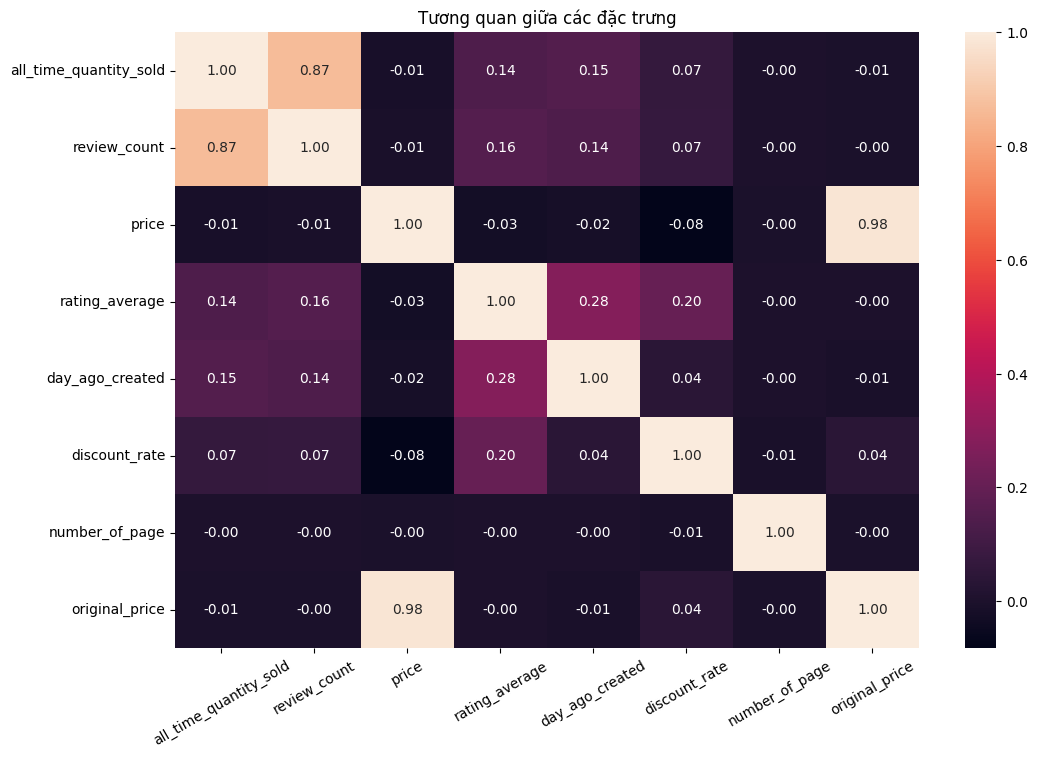

In [527]:
plt.figure(figsize=(12,8))
sns.heatmap(df[set(numeric_cols) - {'id', 'sku'}].corr(), annot=True, fmt='.2f')
plt.xticks(rotation=30)
plt.title('Tương quan giữa các đặc trưng')
plt.show()

In [506]:
cate_cols = set(df.columns) - set(numeric_cols)
cate_profiles = {'missing_ratio': df[cate_cols].isna().sum() * 100.0/len(df[cate_cols]),
               #   'zero_values_ratio':  df[cate_cols].eq(0).sum(axis=1) * 100.0/len(df[cate_cols]),
                      'num_diff_vals': df[cate_cols].nunique(dropna=True),
                      'diff_vals': df[cate_cols].stack(dropna=True).groupby(level=[1]).unique()}
cate_col_profiles_df = pd.DataFrame(cate_profiles).transpose()
cate_col_profiles_df

,authors,book_cover,categories,dich_gia,dimensions,edition,inventory_type,luu_y,manufacturer,name,productset_group_name,publication_date,publisher_vn,short_url
missing_ratio,48.804125,35.358555,0.0,85.686774,82.744197,96.931105,0.0,99.995858,0.550827,0.0,0.0,61.158394,0.035203,0.0
num_diff_vals,9094,17,100,3110,1051,364,3,1,168,44424,101,10896,852,48288
diff_vals,"[Trần Đặng Đăng Khoa, Trần Hồng Ngọc, Lê Quang...","[Bìa mềm, Bìa Da, Bìa cứng, Bìa gập, Bìa rời, ...","[Du ký, Light novel, Phê Bình - Lý Luận Văn Họ...","[Khánh Vân, Phan Quang, Nguyễn Thị Bạch Tuyết,...","[13 x 20, 14,5 x 20,5 cm, 13.5 x 20.5 cm, 15 x...","[bìa mềm, BÌA MỀM, Tiếng Việt, Tặng kèm bookma...","[instock, backorder, preorder]",[Sách không còn kèm CD mà thay bằng ứng dụng t...,"[NXB Trẻ, Nhà Xuất Bản Lao Động, Nhà Xuất Bản ...",[1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàn...,[Nhà Sách Tiki/Sách tiếng Việt/Sách văn học/Du...,"[2022-11-10 00:00:00, 2022-11-11 17:44:46, 202...","[NXB Trẻ, Chibooks, Văn Lang, Edibooks, NXB Ph...",[https://tiki.vn/product-p204317934.html?spid=...


In [507]:
df['dimensions'][df['dimensions'].str.contains('(\d+).?[xX].?(\d+).?[(cm)(CM)]?', na=False)].loc[1100]

'13x18x2.5 cm'

In [508]:
df['dimensions'].str.extractall('(\d+[.,]?\d+.?.?[xX]?.?.?\d+[.,]?\d+)').loc[39592]
df['dimensions'].str.extractall(r'(\d+.?,?\d+).?x.?(\d+.?,?\d+)[.?x.?(\d+.?,?\d+)]?')#['dimensions']

,,0,1
,match,,
0,0,13,20
2,0,"14,5","20,5"
6,0,13.5,20.5
11,0,"14,5","20,5"
14,0,15,23
...,...,...,...
47966,0,14,14
47967,0,14.5,20.5
48087,0,15,23


In [509]:
dimen = pd.DataFrame(df['dimensions'][df['dimensions'].notna()].str.replace('[a-zA-Z]', ' ').str.replace(',', '.').str.split())
# dimen['area'] = dimen['dimensions'].apply(lambda x: list(map(float, x))).apply(lambda x: np.prod(x))
dimen.loc[39592]

dimensions    [<, =", /, "><!--, {, :, 1, #, ;}, {, -, -, :,...
Name: 39592, dtype: object

In [510]:
cate_col_profiles_df.loc['diff_vals', 'manufacturer']

array(['NXB Trẻ', 'Nhà Xuất Bản Lao Động', 'Nhà Xuất Bản Hồng Đức',
       'Nhà Xuất Bản Giáo Dục Việt Nam', 'Nhà Xuất Bản Phụ Nữ Việt Nam',
       'Nhà Xuất Bản Đại Học Quốc Gia Hà Nội',
       'Nhà Xuất Bản Văn Hóa Văn Nghệ', 'Nhà Xuất Bản Dân Trí',
       'Nhà Xuất Bản Văn Học', 'Nhà Xuất Bản Tổng hợp TP.HCM',
       'Nhà Xuất Bản Thế Giới', 'Nhà Xuất Bản Phụ Nữ',
       'Nhà Xuất Bản Thanh Niên', 'Nhà Xuất Bản Tư Pháp',
       'Nhà Xuất Bản Văn Hóa - Văn Nghệ', 'NXB Dân Trí',
       'Nhà Xuất Bản Hội Nhà Văn', 'Nhà Xuất Bản Hà Nội',
       'Nhà Xuất Bản Tri Thức', 'Nhiều Nhà Xuất Bản',
       'Nhà Xuất Bản Kim Đồng', 'Nhà Xuất Bản Văn Hoá Thông Tin', 'oem',
       'ha noi', '-', 'nxb van hoc', 'Nhà Xuất Bản Đà Nẵng',
       'Nhà Xuất Bản Tôn Giáo', 'Nhà Xuất Bản Văn Hoá Dân Tộc',
       'Nhà Xuất Bản Đại Học Sư Phạm', 'Nhà Xuất Bản Khoa Học Xã Hội',
       'Nhà Xuất Bản Chính Trị Quốc Gia Sự Thật',
       'Nhà Xuất Bản Thông Tin Và Truyền Thông',
       'Nhà Xuất Bản Văn Hóa - Văn 

Chọn ra các features phù hợp/ có ảnh hưởng đến yêu cầu bài toán làm đầu vào cho mô hình 

In [511]:
cols = ['original_price', 'discount_rate',
       'rating_average', 'review_count', 'day_ago_created',
       'all_time_quantity_sold', 'number_of_page']
# Thêm một vài cột categories có ý nghĩa đối với output
cols.extend(['book_cover', 'categories', 'inventory_type', 'manufacturer', 'publication_date'])

Xem qua kiểu dữ liệu của các cột

In [512]:
df[cols].dtypes

original_price              int64
discount_rate               int64
rating_average            float64
review_count                int64
day_ago_created             int64
all_time_quantity_sold      int64
number_of_page              int64
book_cover                 object
categories                 object
inventory_type             object
manufacturer               object
publication_date           object
dtype: object

In [513]:
df[['categories', 'inventory_type', 'manufacturer']] = df[['categories', 'inventory_type', 'manufacturer']].astype(str)
df[['categories', 'inventory_type', 'manufacturer']]

,categories,inventory_type,manufacturer
0,Du ký,instock,NXB Trẻ
1,Du ký,backorder,NXB Trẻ
2,Du ký,instock,Nhà Xuất Bản Lao Động
3,Du ký,backorder,Nhà Xuất Bản Hồng Đức
4,Du ký,backorder,NXB Trẻ
...,...,...,...
48286,Thể Dục - Thể Thao,backorder,Nhà Xuất Bản Hà Nội
48287,Thể Dục - Thể Thao,backorder,NXB Trẻ
48288,Thể Dục - Thể Thao,backorder,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội
48289,Thể Dục - Thể Thao,backorder,Nhà Xuất Bản Thể Thao Và Du Lịch


Cột `publication_date` đang có kiểu dữ liệu là object, ta cũng cần chuyển về datetime cho phù hợp

In [514]:
df['publication_date'] = pd.to_datetime(df.publication_date, format = "%Y-%m-%d %H:%M:%S", errors = "coerce")

Có lẽ ta không cần cột này trong đầu vào của mô hình vì cột `day_ago_created` đã có ý nghĩa tương tự

In [515]:
cols.remove('publication_date')

**Xem một vài phân bố của các đặc trưng, từ đó giúp ta quan sát outliers, độ tập trung của dữ liệu**

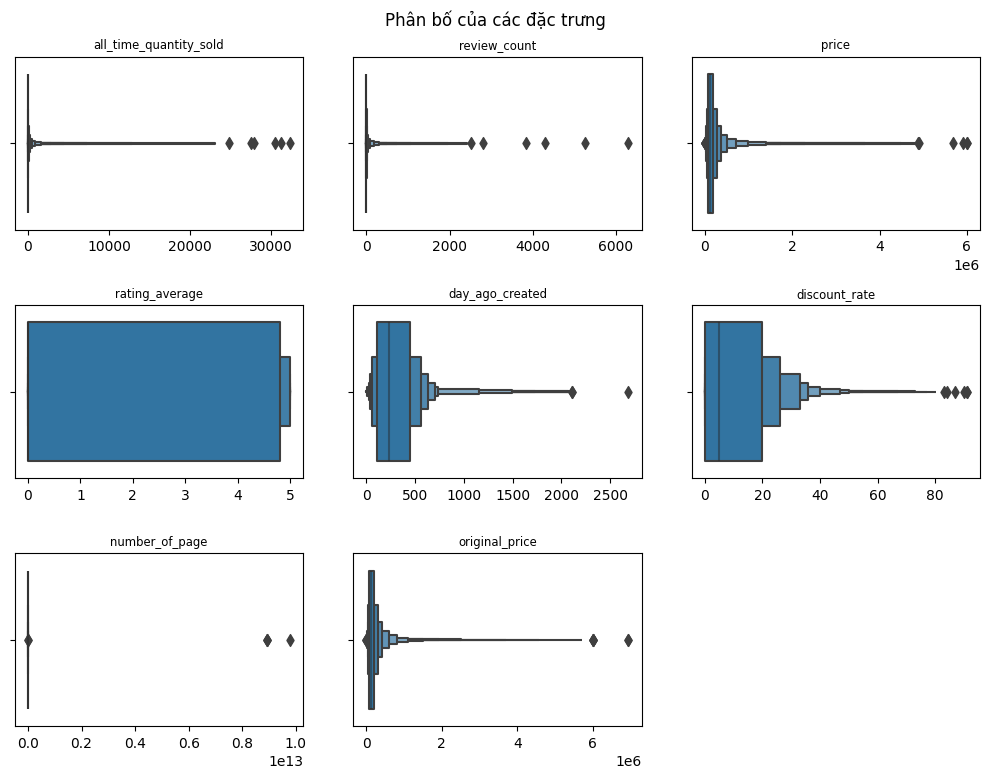

In [525]:
# df_cont = df.select_dtypes([int,float]) 
numeric_df = df[set(numeric_cols) - {'id', 'sku'}]

fig = plt.figure(figsize=(10, 10))
fig.suptitle('Phân bố của các đặc trưng')
for i,col in enumerate(numeric_df.columns, 1): 
    ax = plt.subplot(4,3,i) 
    sns.boxenplot(data = numeric_df, x=numeric_df[col]) 
    plt.xlabel(None)
    plt.title(col, fontsize='small')
    plt.tight_layout(w_pad=3) 

plt.show() 

- `all_time_quantity_sold` phân bố khá đồng đều

**Các cột có giá trị thiếu hay không? Nếu thiếu thì xử lý như thế nào?**

In [516]:
df[cols].isna().sum()

original_price                0
discount_rate                 0
rating_average                0
review_count                  0
day_ago_created               0
all_time_quantity_sold        0
number_of_page                0
book_cover                17075
categories                    0
inventory_type                0
manufacturer                  0
dtype: int64

Cột `book_cover` thiếu khá nhiều, ta sẽ xem qua các giá trị của cột này

In [518]:
df['book_cover'].value_counts()

Bìa mềm                                     27766
Bìa cứng                                     2922
Bìa gập                                       366
Bìa Da                                         43
Bìa rời                                        26
B Format Paperback                             22
Bìa Da Công Nghiệp Microfiber                  21
Box                                            14
Boxset                                         12
Tùy chọn phiên bản bìa cứng hoặc bìa mềm        9
Paperback                                       7
Board book                                      2
Mix Media Pack                                  2
Jigsaw box                                      1
Counterpack holds 48 Mini Activity Books        1
B-format Paperback                              1
Hardcover                                       1
Name: book_cover, dtype: int64

In [529]:
df[df['book_cover'].isna()]

,id,sku,name,short_url,book_cover,price,original_price,discount_rate,rating_average,review_count,inventory_type,productset_group_name,day_ago_created,categories,all_time_quantity_sold,authors,publisher_vn,publication_date,dimensions,manufacturer,number_of_page,dich_gia,edition,luu_y
0,204317934,9972713357587,1111 - Nhật Ký Sáu Vạn Dặm Trên Yên Xe Cà Tàng,https://tiki.vn/product-p204317934.html?spid=2...,NaN,262000,325000,19,5.0,55,instock,Nhà Sách Tiki/Sách tiếng Việt/Sách văn học/Du ký,29,Du ký,666,Trần Đặng Đăng Khoa,NXB Trẻ,2022-11-10,13 x 20,NXB Trẻ,0,NaN,NaN,NaN
4,204649516,8708257676679,Sách - 1111 - NHẬT KÝ SÁU VẠN DẶM TRÊN YÊN XE ...,https://tiki.vn/product-p204649516.html?spid=2...,NaN,292500,325000,10,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách văn học/Du ký,25,Du ký,1,NaN,NXB Trẻ,NaT,NaN,NXB Trẻ,0,NaN,NaN,NaN
5,205508265,1076617717785,(Bìa cứng) HIMALAYA NHỮNG CUỘC PHIÊU LƯU - THI...,https://tiki.vn/product-p205508265.html?spid=2...,NaN,499000,499000,0,5.0,1,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách văn học/Du ký,18,Du ký,22,NaN,Edibooks,NaT,NaN,Nhà Xuất Bản Giáo Dục Việt Nam,0,NaN,NaN,NaN
12,177315574,9649019028637,Nhật Ký Phi Công Tiêm Kích,https://tiki.vn/product-p177315574.html?spid=1...,NaN,136000,145000,6,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách văn học/Du ký,220,Du ký,2,NaN,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội,NaT,NaN,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội,0,NaN,NaN,NaN
23,181991026,7310230176513,Từ Rừng Thẳm Amazon Đến Quê Hương Bolero,https://tiki.vn/product-p181991026.html?spid=1...,NaN,111600,124000,10,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Sách văn học/Du ký,194,Du ký,0,Nguyễn Tập,First News - Trí Việt,NaT,NaN,Nhà Xuất Bản Tổng hợp TP.HCM,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48283,196188327,2217280630883,Sách: Tự Truyện Michael Carrick – Giữa Những L...,https://tiki.vn/product-p196188327.html?spid=1...,NaN,189000,189000,0,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Thể Dục - Thể Thao,96,Thể Dục - Thể Thao,0,NaN,THBooks,NaT,NaN,Nhà Xuất Bản Hà Nội,0,NaN,NaN,NaN
48285,137941354,3319826470439,Sách - NXB Trẻ - Chuyển đổi số - 6 câu hỏi giú...,https://tiki.vn/product-p137941354.html?spid=1...,NaN,102000,102000,0,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Thể Dục - Thể Thao,389,Thể Dục - Thể Thao,0,NaN,NXB Trẻ,NaT,NaN,NXB Trẻ,0,NaN,NaN,NaN
48286,196188369,5713282049823,Sách: Thỏa Giấc Mơ Vàng,https://tiki.vn/product-p196188369.html?spid=1...,NaN,99000,99000,0,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Thể Dục - Thể Thao,95,Thể Dục - Thể Thao,0,NaN,THBooks,NaT,NaN,Nhà Xuất Bản Hà Nội,0,NaN,NaN,NaN
48288,178329990,6962259898378,Combo Sách Dinh Dưỡng Xanh + Thần Dược Xanh (B...,https://tiki.vn/product-p178329990.html?spid=1...,NaN,278000,278000,0,0.0,0,backorder,Nhà Sách Tiki/Sách tiếng Việt/Thể Dục - Thể Thao,209,Thể Dục - Thể Thao,0,NaN,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội,NaT,NaN,Nhà Xuất Bản Đại Học Quốc Gia Hà Nội,0,NaN,NaN,NaN
